In [ ]:
# Step 1: import the libraries

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 2: Read Stock Data

In [3]:
df = pd.read_csv("RELIANCE.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
1,2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2,2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
3,2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
4,2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0
...,...,...,...,...,...,...,...
2629,2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0
2630,2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0
2631,2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0
2632,2019-09-13,1212.000000,1228.500000,1206.900024,1225.599976,1225.599976,5919260.0


In [ ]:
# Step 3: Data Preparation

In [5]:
# Change the 'Date' column to act as index columns
df.index = pd.to_datetime(df['Date'])
df

# Drop The original 'Date' column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0
...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0


In [ ]:
# Step 4: Define the explanatory/predictor variables

In [6]:
# Predictor Variables (X): Features used for prediction (Open-Close, High-Low).
# Response Variable (Y): The outcome being predicted.

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2009-01-02,-6.675018,11.975006
2009-01-05,-16.712006,20.475006
2009-01-06,-2.725006,14.687988
2009-01-07,42.062012,52.750000
2009-01-09,14.187988,29.087006


In [ ]:
# Step 5: Define the target variable

In [27]:
# the column is shifted upward by 1 row.
# So each row now contains the value of the next day's closing price.

# 1 if tomorrow’s Close > today’s Close
# 0 otherwise
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y # indicating if the stock price will rise the next day.

array([1, 1, 0, ..., 1, 0, 0], shape=(2634,))

In [ ]:
# Step 6: Split the data into train and test

In [10]:
# using "Manual Sequential split"
# to keep temporal order since order matters, no shuffling

split_percentage = 0.8
split = int(split_percentage * len(df))

# train data set
X_train = X[:split]
y_train = y[:split]

# test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Step 7: Support Vector Classifier (SVC)

In [13]:
cls = SVC().fit(X_train, y_train)

In [ ]:
# Step 8: Classifier accuracy

In [14]:
print("The data was split into training and testing sets using an 80/20 split.")

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, cls.predict(X_train))

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, cls.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

The data was split into training and testing sets using an 80/20 split.
Training Accuracy: 0.5358329378262933
Testing Accuracy: 0.47248576850094876


In [ ]:
# Step 9: Different Kernels

In [15]:
from sklearn.metrics import accuracy_score

# Linear kernel
cls_linear = SVC(kernel='linear').fit(X_train, y_train)
y_pred_linear = cls_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear}")

# Polynomial kernel
cls_poly = SVC(kernel='poly', degree=3).fit(X_train, y_train)
y_pred_poly = cls_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy with Polynomial Kernel (degree=3): {accuracy_poly}")

# RBF kernel (default)
cls_rbf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred_rbf = cls_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf}")

# Sigmoid kernel
cls_sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)
y_pred_sigmoid = cls_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Accuracy with Sigmoid Kernel: {accuracy_sigmoid}")

Accuracy with Linear Kernel: 0.49146110056925996
Accuracy with Polynomial Kernel (degree=3): 0.48956356736242884
Accuracy with RBF Kernel: 0.47248576850094876
Accuracy with Sigmoid Kernel: 0.5047438330170778


In [ ]:
# Step 10: Strategy implementation

In [16]:
df['Predicted_Signal'] = cls.predict(X)

In [17]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [18]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [19]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120


In [22]:
#Calculate Strategy Cumulative Returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760,0.000000
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459,0.003699
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655,0.003699
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217,0.003699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621,1.747285
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603,1.757267
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120,1.737784


In [ ]:
# Step 11: Visualizing Strategy Returns vs Original Returns

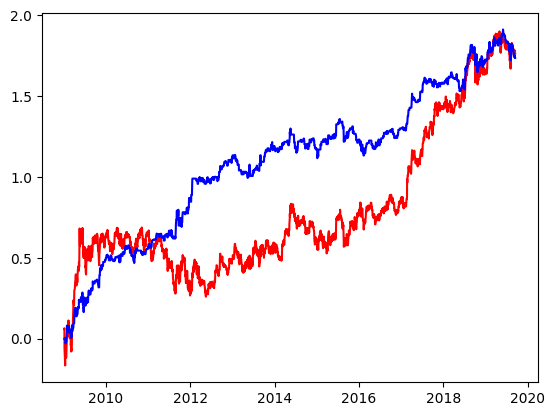

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')